In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#set this so the graphs open internally
%matplotlib inline

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep = '\t') #time separated tsv, in the end of the chipotle.tsv

In [5]:
#assign into a var called chipo:
chipo = df

In [6]:
#first 10 entries:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [12]:
#create a hist of the top 5 items bought:
top5 = chipo.groupby('item_name').agg({
    'quantity': 'sum'
}).sort_values('quantity', ascending=False)[:5]
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


<AxesSubplot:xlabel='item_name'>

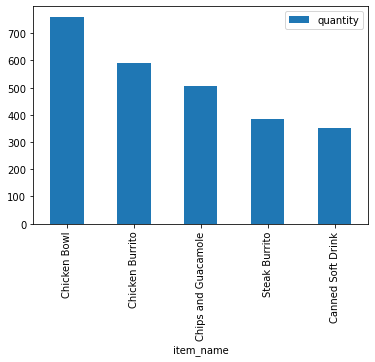

In [15]:
top5.plot(kind = 'bar')

In [21]:
top5.reset_index()

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

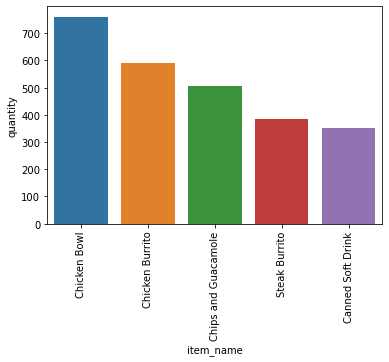

In [27]:
import seaborn as sns
sns.barplot(y = 'quantity', 
            x = 'item_name',
            data = top5.reset_index())
plt.xticks(rotation='vertical')

In [ ]:
#create a scatterplot with the number of items ordered per order price
#price should be in the X-axis and items in the Y-axis

In [28]:
price = chipo.item_price.str.slice(1).astype(float) #1 is taking out the $ sign
price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [29]:
chipo['price'] = price

<AxesSubplot:xlabel='price', ylabel='quantity'>

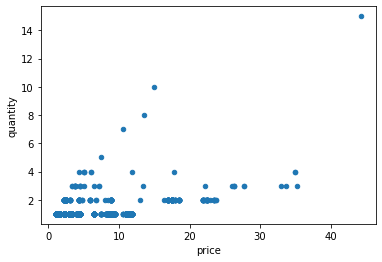

In [32]:
chipo.plot(x = 'price', y = 'quantity', kind = 'scatter')

<AxesSubplot:xlabel='price', ylabel='quantity'>

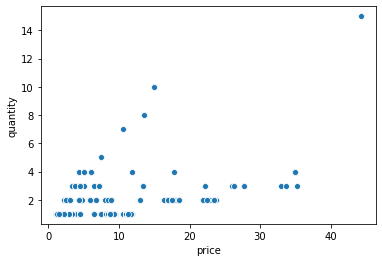

In [33]:
sns.scatterplot(x = 'price', y = 'quantity', data=chipo)